# Week 1

## Useful functions

In [256]:
from functions_week1_2 import *

# libraries to import
import numpy as np
import matplotlib.pyplot as plt

# Week 3

## Goals and Objectives

- The success probability of explore-then-commit algo, as a function of sub-optimality gap and exploration time. Of course, this is also averaged over 50-100 runs.

## Setup

In [258]:
#Initialisation of general parameters for the Explore then Commit strategy of the Multi-Armed Bandit problem

# Total number of arms
N_ARMS = 5

# Number of rounds
nbr_throws = 10000

# exploration time
T_EXPLORATION = 1000

# divide T_exploration in 100 values and fill array of exploration times
T_EXPLORATION_ARRAY = np.linspace(0, T_EXPLORATION, 51, endpoint= True, dtype=int) 

# print the array of exploration times
print(T_EXPLORATION_ARRAY)


# reward for a win
REWARD = 1

# sub-optimality gap
GAPS = [0.01, 0.02, 0.1, 0.2, 0.499]

# Array of list of arms Probabilities repartitions
array_probs = []

# Probability repartition with sub-optimality gap
for gap in GAPS:
    # probability of success for the best arm
    p_best = 0.5 + gap

    # probability of success for the second best arm
    p_second_best = 0.5

    # calculate the other arm probabilities as random between 0 and p_second_best
    probs = np.random.rand(N_ARMS - 2) * p_second_best

    # add the best and second best arm probabilities
    probs = np.append(probs, [p_best, p_second_best])

    # shuffle the probabilities and add them to the list
    np.random.shuffle(probs)
    array_probs.append(probs)

# index of probabilities array in arms_probs
probs_index = 0
highest_prob_arm = np.argmax(array_probs[probs_index])




[   0   20   40   60   80  100  120  140  160  180  200  220  240  260
  280  300  320  340  360  380  400  420  440  460  480  500  520  540
  560  580  600  620  640  660  680  700  720  740  760  780  800  820
  840  860  880  900  920  940  960  980 1000]


In [259]:
def explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs):

    # Initialize arrays to keep track of pulls, successes, results, regrets, and values
    n_pulls = np.zeros(num_arms, dtype=int)
    n_successes = np.zeros(num_arms, dtype=int)
    results = np.zeros((num_arms, max_throws), dtype=int)
    regrets = np.zeros(max_throws, dtype=float)
    selected_best_arm = False
    

    # Counter for the current regret value
    pull_counter = 0
    
    # Exploration phase for each arm
    for arm in range(num_arms):
        for i in range(exploration):

            n_pulls[arm] += 1
            pull_counter += 1
            
            if np.random.rand() < arm_probs[arm]:
                n_successes[arm] += 1
                reward = rwd
            else:
                reward = 0

            results[arm, n_pulls[arm] - 1] = reward
            #regrets[pull_counter - 1], _, _ = compute_regret(n_pulls, arm_probs, pull_counter, 1)

    arm = np.random.randint(num_arms)
    # Commit phase
    if np.any(n_pulls > 0):
        arm = np.argmax(np.where(n_pulls > 0, n_successes / n_pulls, 0))
    else:
        arm = np.random.randint(num_arms)
    
    if arm == np.argmax(arm_probs):
        selected_best_arm = True
    
    return results, regrets, n_successes, selected_best_arm

### A function that runs the explore-then-commit algorithm nbr_runs times and returns the average succes rate of the algorithm.
### A success is when the best arm is chosen at the commit time.

In [260]:
# Function that runs the explore then commit algorithm a given number of times and returns the percentage of times the best arm was selected
def run_explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs, nbr_runs):
    
    # Initialize array to keep track of the number of times the best arm was selected
    selected_best_arm = np.zeros(nbr_runs, dtype=bool)
    
    # Run the explore then commit algorithm a given number of times
    for i in range(nbr_runs):
        _, _, _, selected_best_arm[i] = explore_then_commit(num_arms, exploration, max_throws, rwd, arm_probs)
        #print("Trial " + str(i) + ", best arm selected: " + str(selected_best_arm[i])+ ", exploration: " + str(exploration))
        
    # Return the percentage of times the best arm was selected
    return float(np.sum(selected_best_arm) / nbr_runs) 

### A function that plots the success rate as a function of the sub-optimality gap using the previous function.

In [261]:
# Function that runs the 'run_explore_then_commit' function for a range of values of T_EXPLORATION and plots the array of percentages as a function of T_EXPLORATION
def plot_explore_then_commit(num_arms, t_explorations, max_throws, rwd, arm_probs_list, nbr_runs, gaps):
        
    success_rate_list_collection = []

    # Run the 'run_explore_then_commit' function for a range of values of T_EXPLORATION
    for arm_probs in arm_probs_list:
        i = 0
        print("arm_probs: " , arm_probs)
        
        # Initialize array to keep track of the percentage of times the best arm was selected for the value of t_exploration
        selected_best_arm_list = np.zeros(len(t_explorations), dtype=float)
        
        for t_exploration in t_explorations:
            selected_best_arm_list[i] = run_explore_then_commit(num_arms, t_exploration, max_throws, rwd, arm_probs, nbr_runs)
            i += 1
        success_rate_list_collection.append(selected_best_arm_list)
    

    # Plot the array of percentages as a function of T_EXPLORATION
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.legend()
    plt.show()
    
    
    # Plot the array of percentages as a function of T_EXPLORATION on a log scale
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.xscale("log")
    plt.legend()
    plt.show()
    
    # Plot the array of percentages as a function of T_EXPLORATION on a log scale
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.yscale("log")
    plt.legend()
    plt.show()
    
    # Plot the array of percentages as a function of T_EXPLORATION on a log scale
    for i in range(len(success_rate_list_collection)):
        plt.plot(t_explorations, success_rate_list_collection[i], label = "Gap: " + str(gaps[i]))
    plt.xlabel("T_EXPLORATION")
    plt.ylabel("P(best arm selected)")
    plt.title("P(best arm selected) as a function of the T_EXPLORATION")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()
    

arm_probs:  [0.20413817 0.5        0.51       0.4732609  0.01495316]
arm_probs:  [0.40293596 0.22435317 0.35084874 0.5        0.52      ]
arm_probs:  [0.5        0.44002136 0.3073325  0.25865399 0.6       ]
arm_probs:  [0.45368647 0.7        0.28019008 0.5        0.06053875]
arm_probs:  [0.999      0.27269245 0.5        0.33692413 0.31331546]


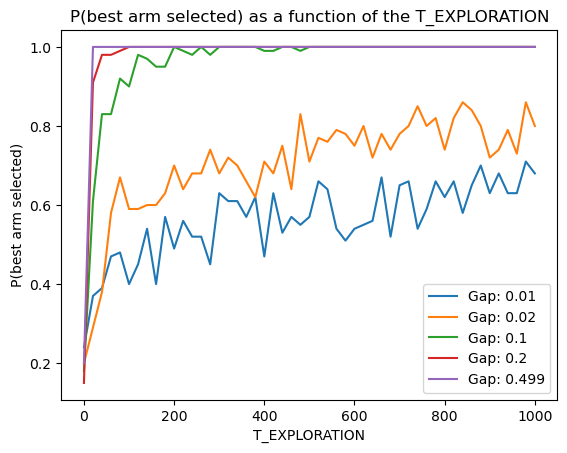

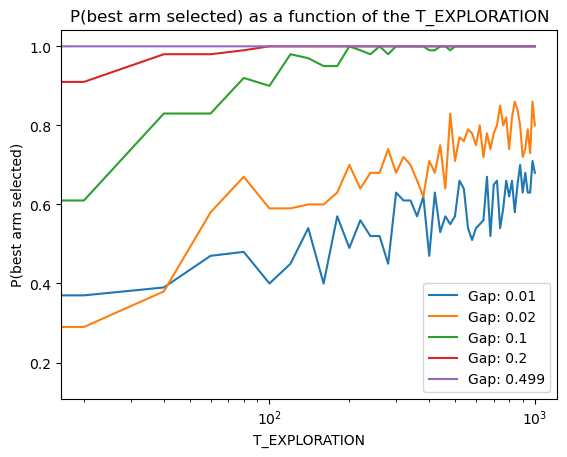

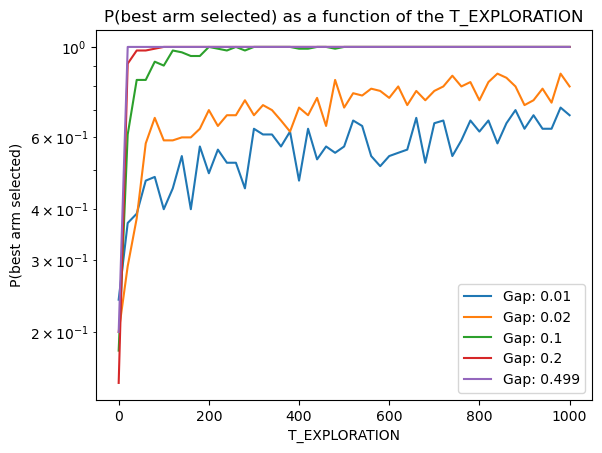

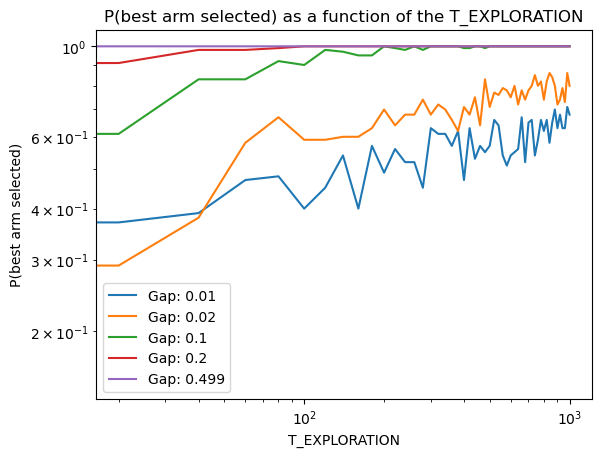

In [262]:
# Run the 'plot_explore_then_commit' function for 5 arms, 10000 throws, a reward of 1, and 100 runs

# simple T_EXPLORATION_ARRAY
TEST_EXPLORATION_ARRAY = [1, 2, 3, 4, 5, 10]

plot_explore_then_commit(5, T_EXPLORATION_ARRAY, 1000, 1, array_probs, 100, GAPS)